## Multi class classifier 
In this notebook we building a classifier for the front view image and determing the squat foot stance to be wide, normal or narrow. Here a multi-class classifier is to be used. The one-vs-rest logistic regression classifier is used as a baseline. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
x_test=np.loadtxt("../train_test_set/x_features_test.txt")
xs_test = x_test.shape
x_new_test = np.zeros((xs_test[0], xs_test[1]+1))
x_new_test[:, :-1] = x_test
x_new_test[:,-1]=((x_test[:,14]-x_test[:,11])/(x_test[:,5]-x_test[:,2]))
x_new_test[np.isinf(x_new_test)]=0.0
x_new_test.shape

/home/ubuntu/.local/share/virtualenvs/squatsmart-USICYa74/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


(1277, 51)

Adding an additional feature, foot stance width measured in terms of the shoulder width. 

In [3]:
x_train=np.loadtxt("../train_test_set/x_features_train.txt")
xs_train = x_train.shape
x_new_train = np.zeros((xs_train[0], xs_train[1]+1))
x_new_train[:, :-1] = x_train
x_new_train[:,-1]=((x_train[:,14]-x_train[:,11])/(x_train[:,5]-x_train[:,2]))
x_new_train[np.isinf(x_new_train)]=0.0
x_new_train.shape

/home/ubuntu/.local/share/virtualenvs/squatsmart-USICYa74/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


(2174, 51)

In [4]:
with open("../train_test_set/y_labels_test.txt", "r") as fp:
    y_test = [x[:-1] for x in fp.readlines()]

In [5]:
with open("../train_test_set/y_labels_train.txt", "r") as fp:
    y_train = [x[:-1] for x in fp.readlines()]

#### Model Building

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(x_new_train, y_train)
clf.score(x_new_test,y_test)

0.4549725920125294

#### Baseline classifier - One-vs-rest-logistic-regression-classifier

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')
model.fit(x_new_train, y_train)
model.score(x_new_test,y_test)

/home/ubuntu/.local/share/virtualenvs/squatsmart-USICYa74/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/.local/share/virtualenvs/squatsmart-USICYa74/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solv

0.6844166014095536

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_new_train, y_train)
neigh.score(x_new_test,y_test)

0.754894283476899

In [9]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_new_train, y_train)
neigh.score(x_new_test,y_test)

0.7564604541895067

In [10]:
x_new_train.shape

(2174, 51)

In [11]:
#drop unnecessary keypoints

In [12]:
# Delete column at index 2 & 3
x_new_train2 = np.delete(x_new_train, [3,4,6,7,15,16,17,18,28,29,31,32,40,41,42,43], axis=1)
x_new_test2  = np.delete(x_new_test,  [3,4,6,7,15,16,17,18,28,29,31,32,40,41,42,43], axis=1)

In [13]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_new_train2, y_train)
neigh.score(x_new_test2,y_test)

0.7361002349256069

In [14]:
x_new_test2.shape

(1277, 35)

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(x_new_train2, y_train)
clf.score(x_new_test2,y_test)

0.5473766640563822

In [16]:
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(x_new_train, y_train)
clf.score(x_new_test,y_test)

0.4581049334377447

In [19]:
from sklearn import svm
clf_svc2 = svm.SVC()
clf_svc2.fit(x_new_train2, y_train)
clf_svc2.score(x_new_test2,y_test)

0.7791699295223179

In [18]:
from sklearn import svm
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(x_new_train, y_train)
clf_svc.score(x_new_test,y_test)

0.8026624902114331

Normalized confusion matrix
[[0.54372624 0.45627376 0.        ]
 [0.05809129 0.94190871 0.        ]
 [0.08646617 0.16541353 0.7481203 ]]


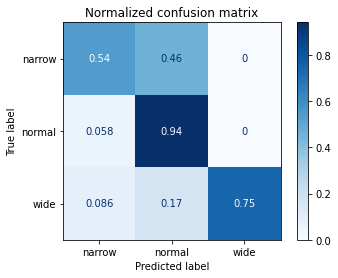

In [22]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# Plot non-normalized confusion matrix
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_svc2, x_new_test2, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()
#plt.savefig('confusion_matrix_ovr_logistic01.png')

In [33]:
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(x_new_train, y_train)
clf_svc.score(x_new_test,y_test)

0.8026624902114331

In [34]:

clf_svc = svm.SVC(decision_function_shape='ovo')
clf_svc.fit(x_new_train, y_train)
clf_svc.score(x_new_test,y_test)

0.8386844166014096

In [25]:
clf_svc = svm.SVC()
clf_svc.fit(x_new_train2, y_train)
clf_svc.score(x_new_test2,y_test)

0.7791699295223179

Normalized confusion matrix
[[0.54372624 0.45627376 0.        ]
 [0.05809129 0.94190871 0.        ]
 [0.08646617 0.16541353 0.7481203 ]]


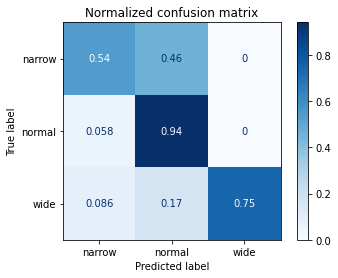

<Figure size 432x288 with 0 Axes>

In [27]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# Plot non-normalized confusion matrix
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_svc, x_new_test2, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()
plt.savefig('confusion_matrix_svm.png')

In [30]:
y_score = clf_svc.decision_function(x_new_test2)

In [36]:
from sklearn.preprocessing import label_binarize
Y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = Y_test.shape[1]

/home/ubuntu/.local/share/virtualenvs/squatsmart-USICYa74/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: nan


/home/ubuntu/.local/share/virtualenvs/squatsmart-USICYa74/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
